# 😌 Análise Completa de Estresse
## Análise interativa dos seus padrões de estresse e bem-estar mental

**📊 Dados disponíveis:** Registros contínuos de estresse ao longo do dia  
**⏰ Período:** Últimos 365 dias com milhares de medições  
**🎯 Objetivo:** Entender padrões, tendências e fatores que influenciam seu estresse


In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

# Conectar aos bancos de dados do GarminDB
garmin_db_path = os.path.expanduser('~/HealthData/DBs/garmin.db')
monitoring_db_path = os.path.expanduser('~/HealthData/DBs/garmin_monitoring.db')

conn_garmin = sqlite3.connect(garmin_db_path)
conn_monitoring = sqlite3.connect(monitoring_db_path)

print('✅ Conectado aos bancos GarminDB')
print('📊 Preparando análise de estresse...')


✅ Conectado aos bancos GarminDB
📊 Preparando análise de estresse...


In [2]:
# Carregar e analisar dados de estresse
stress_query = """
SELECT 
    timestamp,
    stress
FROM stress 
WHERE timestamp >= datetime('now', '-365 days')
  AND stress >= 0  -- Filtrar valores inválidos (-1)
ORDER BY timestamp DESC;
"""

# Carregar dados de estresse
df_stress = pd.read_sql_query(stress_query, conn_garmin)
df_stress['timestamp'] = pd.to_datetime(df_stress['timestamp'])
df_stress['date'] = df_stress['timestamp'].dt.date
df_stress['hour'] = df_stress['timestamp'].dt.hour
df_stress['weekday'] = df_stress['timestamp'].dt.day_name()
df_stress['is_weekend'] = df_stress['timestamp'].dt.weekday >= 5

print("😌 ANÁLISE DE ESTRESSE - ÚLTIMOS 365 DIAS")
print("=" * 50)

# Estatísticas básicas dos registros contínuos
total_records = len(df_stress)
days_with_data = df_stress['date'].nunique()
avg_records_per_day = total_records / days_with_data if days_with_data > 0 else 0

print(f"📊 Registros totais: {total_records:,}")
print(f"📅 Dias com dados: {days_with_data}")
print(f"📈 Registros por dia: {avg_records_per_day:.0f} em média")
print(f"📅 Período: {df_stress['date'].min()} até {df_stress['date'].max()}")

# Estatísticas gerais de estresse
print(f"\n😌 ESTATÍSTICAS GERAIS DE ESTRESSE:")
print(f"   📊 Estresse médio: {df_stress['stress'].mean():.1f}")
print(f"   📊 Mediana: {df_stress['stress'].median():.1f}")
print(f"   📊 Desvio padrão: {df_stress['stress'].std():.1f}")
print(f"   📊 Faixa: {df_stress['stress'].min():.0f} - {df_stress['stress'].max():.0f}")
print(f"   📊 Percentil 25: {df_stress['stress'].quantile(0.25):.1f}")
print(f"   📊 Percentil 75: {df_stress['stress'].quantile(0.75):.1f}")
print(f"   📊 Percentil 95: {df_stress['stress'].quantile(0.95):.1f}")

# Criar dados diários agregados para análises 
daily_stress = df_stress.groupby('date').agg({
    'stress': ['mean', 'min', 'max', 'std', 'count']
}).round(1)

daily_stress.columns = ['avg_stress', 'min_stress', 'max_stress', 'std_stress', 'readings_count']
daily_stress = daily_stress.reset_index()
daily_stress['date'] = pd.to_datetime(daily_stress['date'])

print(f"\n📊 ANÁLISE DIÁRIA:")
print(f"   📊 Estresse médio diário: {daily_stress['avg_stress'].mean():.1f}")
print(f"   📊 Dia mais estressante: {daily_stress['max_stress'].max():.0f} (pico)")
print(f"   📊 Dia mais tranquilo: {daily_stress['min_stress'].min():.0f} (mínimo)")
print(f"   📊 Variabilidade diária média: {daily_stress['std_stress'].mean():.1f}")

print("\n📈 Dados carregados com sucesso! Execute as próximas células para visualizações...")


😌 ANÁLISE DE ESTRESSE - ÚLTIMOS 365 DIAS
📊 Registros totais: 394,582
📅 Dias com dados: 365
📈 Registros por dia: 1081 em média
📅 Período: 2024-09-09 até 2025-09-09

😌 ESTATÍSTICAS GERAIS DE ESTRESSE:
   📊 Estresse médio: 29.3
   📊 Mediana: 24.0
   📊 Desvio padrão: 19.5
   📊 Faixa: 0 - 100
   📊 Percentil 25: 17.0
   📊 Percentil 75: 36.0
   📊 Percentil 95: 72.0

📊 ANÁLISE DIÁRIA:
   📊 Estresse médio diário: 29.6
   📊 Dia mais estressante: 100 (pico)
   📊 Dia mais tranquilo: 0 (mínimo)
   📊 Variabilidade diária média: 17.9

📈 Dados carregados com sucesso! Execute as próximas células para visualizações...


/var/folders/pm/gfxqw0wd6dz35t8_f0blfkmw0000gn/T/ipykernel_42570/779728718.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = axes[1,1].boxplot(stress_by_type, labels=labels, patch_artist=True)
/var/folders/pm/gfxqw0wd6dz35t8_f0blfkmw0000gn/T/ipykernel_42570/779728718.py:99: UserWarning: Glyph 128524 (\N{RELIEVED FACE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/pmdusso/code/GarminDB/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128524 (\N{RELIEVED FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


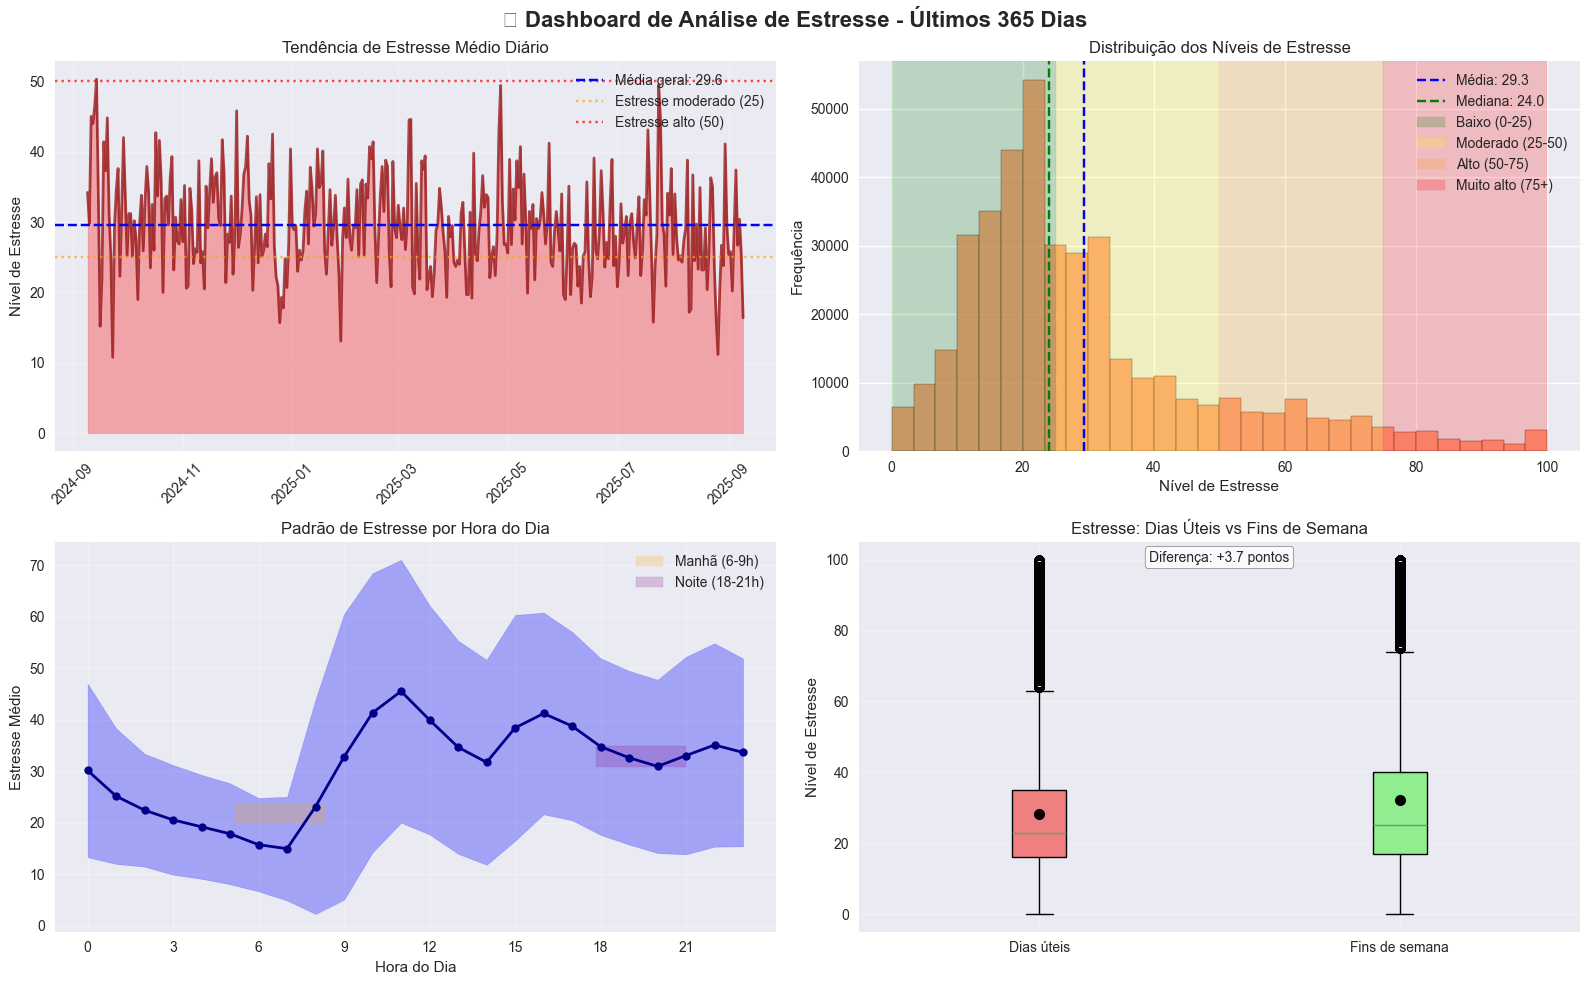

✨ Dashboard principal criado!


In [3]:
# Dashboard Principal de Estresse
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('😌 Dashboard de Análise de Estresse - Últimos 365 Dias', fontsize=16, fontweight='bold')

# 1. Tendência de estresse médio diário
axes[0,0].plot(daily_stress['date'], daily_stress['avg_stress'], alpha=0.7, linewidth=2, color='darkred')
axes[0,0].fill_between(daily_stress['date'], daily_stress['avg_stress'], alpha=0.3, color='red')

# Média geral e zonas de estresse
avg_stress = daily_stress['avg_stress'].mean()
axes[0,0].axhline(y=avg_stress, color='blue', linestyle='--', 
                  label=f'Média geral: {avg_stress:.1f}')
axes[0,0].axhline(y=25, color='orange', linestyle=':', alpha=0.7, label='Estresse moderado (25)')
axes[0,0].axhline(y=50, color='red', linestyle=':', alpha=0.7, label='Estresse alto (50)')

axes[0,0].set_title('Tendência de Estresse Médio Diário')
axes[0,0].set_ylabel('Nível de Estresse')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# 2. Distribuição dos níveis de estresse com categorias
axes[0,1].hist(df_stress['stress'], bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[0,1].axvline(df_stress['stress'].mean(), color='blue', linestyle='--', 
                  label=f'Média: {df_stress["stress"].mean():.1f}')
axes[0,1].axvline(df_stress['stress'].median(), color='green', linestyle='--', 
                  label=f'Mediana: {df_stress["stress"].median():.1f}')

# Zonas de estresse
axes[0,1].axvspan(0, 25, alpha=0.2, color='green', label='Baixo (0-25)')
axes[0,1].axvspan(25, 50, alpha=0.2, color='yellow', label='Moderado (25-50)')  
axes[0,1].axvspan(50, 75, alpha=0.2, color='orange', label='Alto (50-75)')
axes[0,1].axvspan(75, 100, alpha=0.2, color='red', label='Muito alto (75+)')

axes[0,1].set_title('Distribuição dos Níveis de Estresse')
axes[0,1].set_xlabel('Nível de Estresse')
axes[0,1].set_ylabel('Frequência')
axes[0,1].legend()

# 3. Padrões de estresse por hora do dia (muito importante!)
hourly_stress = df_stress.groupby('hour')['stress'].agg(['mean', 'std', 'count']).reset_index()
hourly_stress['std'] = hourly_stress['std'].fillna(0)

axes[1,0].plot(hourly_stress['hour'], hourly_stress['mean'], marker='o', linewidth=2, 
               markersize=6, color='darkblue')
axes[1,0].fill_between(hourly_stress['hour'], 
                       hourly_stress['mean'] - hourly_stress['std'],
                       hourly_stress['mean'] + hourly_stress['std'], 
                       alpha=0.3, color='blue')

# Destacar horários críticos
morning_stress = hourly_stress[hourly_stress['hour'].between(6, 9)]['mean'].mean()
evening_stress = hourly_stress[hourly_stress['hour'].between(18, 21)]['mean'].mean()

axes[1,0].axhspan(morning_stress-2, morning_stress+2, xmin=6/24, xmax=9/24, 
                  alpha=0.2, color='orange', label='Manhã (6-9h)')
axes[1,0].axhspan(evening_stress-2, evening_stress+2, xmin=18/24, xmax=21/24, 
                  alpha=0.2, color='purple', label='Noite (18-21h)')

axes[1,0].set_title('Padrão de Estresse por Hora do Dia')
axes[1,0].set_xlabel('Hora do Dia')
axes[1,0].set_ylabel('Estresse Médio')
axes[1,0].set_xticks(range(0, 24, 3))
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Estresse: Dias da semana vs Fins de semana
weekday_stress = df_stress[~df_stress['is_weekend']]['stress']
weekend_stress = df_stress[df_stress['is_weekend']]['stress']

# Box plot comparativo
stress_by_type = [weekday_stress.values, weekend_stress.values]
labels = ['Dias úteis', 'Fins de semana'] 
colors = ['lightcoral', 'lightgreen']

box_plot = axes[1,1].boxplot(stress_by_type, labels=labels, patch_artist=True)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

# Adicionar médias
for i, data in enumerate(stress_by_type):
    axes[1,1].plot(i+1, np.mean(data), 'ko', markersize=8, 
                   label=f'Média: {np.mean(data):.1f}' if i==0 else f'{np.mean(data):.1f}')

axes[1,1].set_title('Estresse: Dias Úteis vs Fins de Semana')
axes[1,1].set_ylabel('Nível de Estresse')
axes[1,1].grid(True, alpha=0.3)

# Adicionar estatísticas no gráfico
weekday_avg = weekday_stress.mean()
weekend_avg = weekend_stress.mean()
difference = weekend_avg - weekday_avg

axes[1,1].text(0.5, 0.95, f'Diferença: {difference:+.1f} pontos', 
               transform=axes[1,1].transAxes, ha='center', fontsize=10,
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"✨ Dashboard principal criado!")


📅 PADRÕES SEMANAIS DE ESTRESSE
🏢 DIAS ÚTEIS (261 dias):
   Estresse médio: 28.4 (±6.6)
   Picos médios: 92.7
   Variabilidade: 16.9

🏖️ FINS DE SEMANA (104 dias):
   Estresse médio: 32.4 (±6.7)
   Picos médios: 95.7
   Variabilidade: 20.4

📊 Diferença fim de semana: +4.0 pontos (mais estressante)

📊 Estresse médio por dia da semana:
   🏢 Segunda: 24.4 (±5.2) | 53 dias
   🏢 Terça: 27.5 (±6.0) | 53 dias
   🏢 Quarta: 29.3 (±6.2) | 52 dias
   🏢 Quinta: 31.0 (±6.6) | 51 dias
   🏢 Sexta: 30.0 (±7.1) | 52 dias
   🏖️ Sábado: 34.8 (±5.8) | 52 dias
   🏖️ Domingo: 30.1 (±6.7) | 52 dias


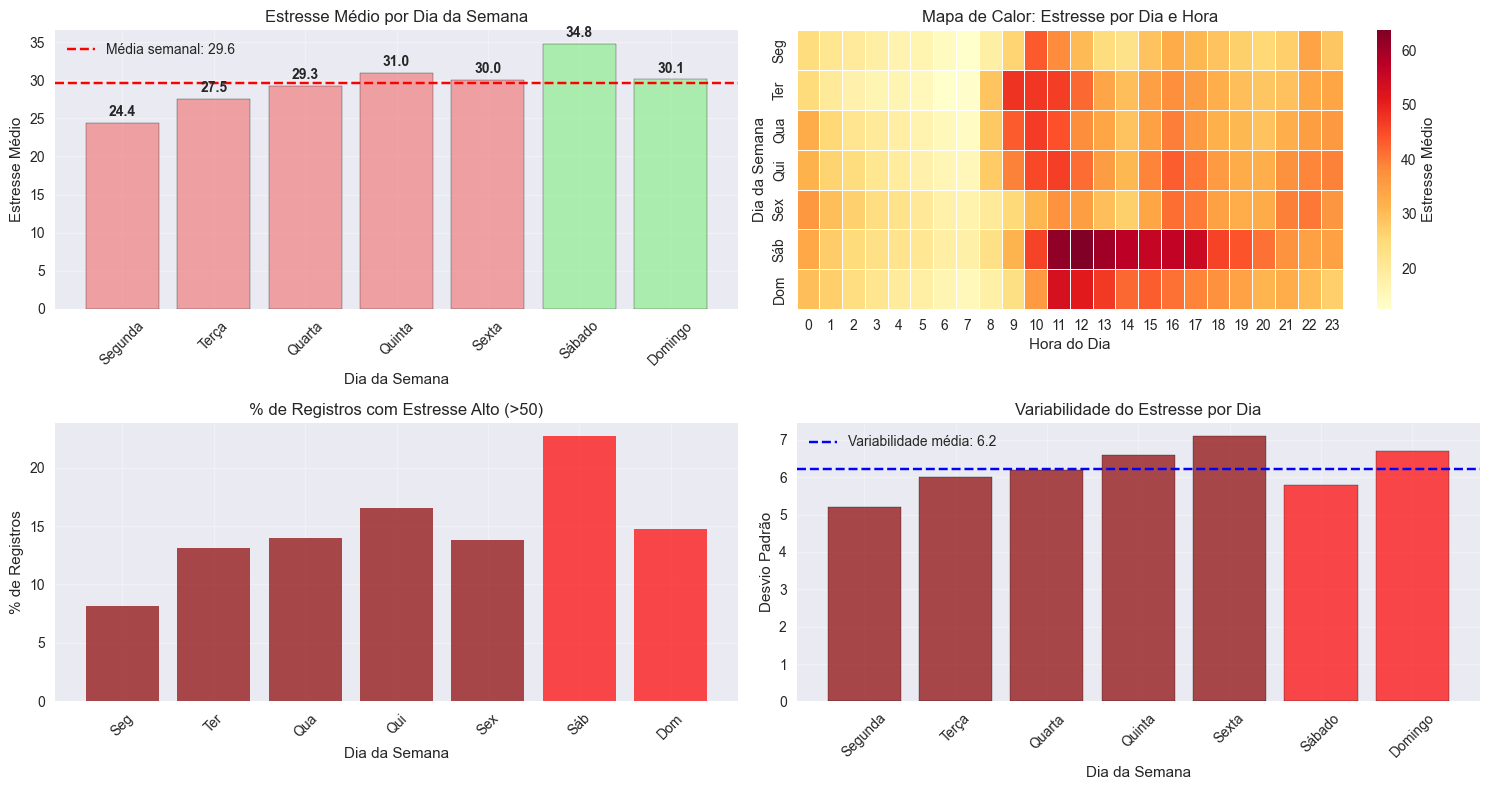

In [4]:
# Análise Detalhada de Padrões Semanais
print("📅 PADRÕES SEMANAIS DE ESTRESSE")
print("=" * 40)

# Adicionar informações de dia da semana aos dados diários
daily_stress['weekday'] = daily_stress['date'].dt.day_name()
daily_stress['is_weekend'] = daily_stress['date'].dt.weekday >= 5

# Comparação dias úteis vs fins de semana (dados diários)
weekday_daily = daily_stress[~daily_stress['is_weekend']]['avg_stress']
weekend_daily = daily_stress[daily_stress['is_weekend']]['avg_stress']

print(f"🏢 DIAS ÚTEIS ({len(weekday_daily)} dias):")
print(f"   Estresse médio: {weekday_daily.mean():.1f} (±{weekday_daily.std():.1f})")
print(f"   Picos médios: {daily_stress[~daily_stress['is_weekend']]['max_stress'].mean():.1f}")
print(f"   Variabilidade: {daily_stress[~daily_stress['is_weekend']]['std_stress'].mean():.1f}")

print(f"\n🏖️ FINS DE SEMANA ({len(weekend_daily)} dias):")
print(f"   Estresse médio: {weekend_daily.mean():.1f} (±{weekend_daily.std():.1f})")
print(f"   Picos médios: {daily_stress[daily_stress['is_weekend']]['max_stress'].mean():.1f}")
print(f"   Variabilidade: {daily_stress[daily_stress['is_weekend']]['std_stress'].mean():.1f}")

difference = weekend_daily.mean() - weekday_daily.mean()
print(f"\n📊 Diferença fim de semana: {difference:+.1f} pontos ({'mais estressante' if difference > 0 else 'mais relaxante'})")

# Análise detalhada por dia da semana
print(f"\n📊 Estresse médio por dia da semana:")
daily_weekday_stats = daily_stress.groupby('weekday')['avg_stress'].agg(['mean', 'std', 'count']).round(1)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_names_pt = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

for day, name_pt in zip(day_order, day_names_pt):
    if day in daily_weekday_stats.index:
        avg = daily_weekday_stats.loc[day, 'mean']
        std = daily_weekday_stats.loc[day, 'std']
        count = daily_weekday_stats.loc[day, 'count']
        emoji = '🏢' if day not in ['Saturday', 'Sunday'] else '🏖️'
        print(f"   {emoji} {name_pt}: {avg:.1f} (±{std:.1f}) | {count:.0f} dias")

# Visualização dos padrões semanais
plt.figure(figsize=(15, 8))

# Gráfico 1: Estresse por dia da semana
plt.subplot(2, 2, 1)
ordered_stats = daily_weekday_stats.reindex(day_order)
stress_means = ordered_stats['mean']
colors = ['lightcoral' if day not in ['Saturday', 'Sunday'] else 'lightgreen' for day in day_order]

bars = plt.bar(range(len(day_names_pt)), stress_means, color=colors, alpha=0.7, edgecolor='black')
plt.axhline(y=stress_means.mean(), color='red', linestyle='--', 
            label=f'Média semanal: {stress_means.mean():.1f}')
plt.title('Estresse Médio por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Estresse Médio')
plt.xticks(range(len(day_names_pt)), day_names_pt, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Adicionar valores nas barras
for i, (bar, value) in enumerate(zip(bars, stress_means)):
    if not np.isnan(value):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Heatmap de estresse por dia da semana e hora
plt.subplot(2, 2, 2)
df_stress['weekday_pt'] = df_stress['weekday'].map({
    'Monday': 'Seg', 'Tuesday': 'Ter', 'Wednesday': 'Qua', 
    'Thursday': 'Qui', 'Friday': 'Sex', 'Saturday': 'Sáb', 'Sunday': 'Dom'
})

# Criar pivot table para heatmap
heatmap_data = df_stress.pivot_table(values='stress', index='weekday_pt', 
                                     columns='hour', aggfunc='mean')
# Reordenar dias da semana
day_order_pt = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
heatmap_data = heatmap_data.reindex(day_order_pt)

sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Estresse Médio'}, 
            fmt='.1f', linewidths=0.5)
plt.title('Mapa de Calor: Estresse por Dia e Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')

# Gráfico 3: Distribuição de estresse alto (>50) por dia da semana
plt.subplot(2, 2, 3)
high_stress = df_stress[df_stress['stress'] > 50]
stress_counts = high_stress['weekday_pt'].value_counts().reindex(day_order_pt, fill_value=0)
total_counts = df_stress['weekday_pt'].value_counts().reindex(day_order_pt, fill_value=1)
high_stress_pct = (stress_counts / total_counts * 100).fillna(0)

colors = ['red' if day in ['Sáb', 'Dom'] else 'darkred' for day in day_order_pt]
plt.bar(day_order_pt, high_stress_pct, color=colors, alpha=0.7)
plt.title('% de Registros com Estresse Alto (>50)')
plt.xlabel('Dia da Semana') 
plt.ylabel('% de Registros')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Gráfico 4: Variabilidade do estresse por dia
plt.subplot(2, 2, 4)
variability = ordered_stats['std']
plt.bar(range(len(day_names_pt)), variability, color=colors, alpha=0.7, edgecolor='black')
plt.axhline(y=variability.mean(), color='blue', linestyle='--', 
            label=f'Variabilidade média: {variability.mean():.1f}')
plt.title('Variabilidade do Estresse por Dia')
plt.xlabel('Dia da Semana')
plt.ylabel('Desvio Padrão')
plt.xticks(range(len(day_names_pt)), day_names_pt, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


📅 TENDÊNCIAS MENSAIS DE ESTRESSE
📊 Últimos 6 meses:
   2025-04: 28.9 médio (±7.0) | Picos 94.2 | 30 dias
   2025-05: 30.6 médio (±5.3) | Picos 94.1 | 31 dias
   2025-06: 26.7 médio (±5.9) | Picos 92.3 | 30 dias
   2025-07: 29.8 médio (±7.2) | Picos 94.1 | 31 dias
   2025-08: 26.6 médio (±6.9) | Picos 92.5 | 31 dias
   2025-09: 26.0 médio (±6.3) | Picos 85.9 | 8 dias

🎯 DISTRIBUIÇÃO POR CATEGORIA:
   💚 Baixo (0-25): 221,270 registros (56.1%)
   💛 Moderado (0-25): 115,835 registros (29.4%)
   🧡 Alto (0-25): 42,172 registros (10.7%)
   🔴 Muito Alto (0-25): 15,305 registros (3.9%)


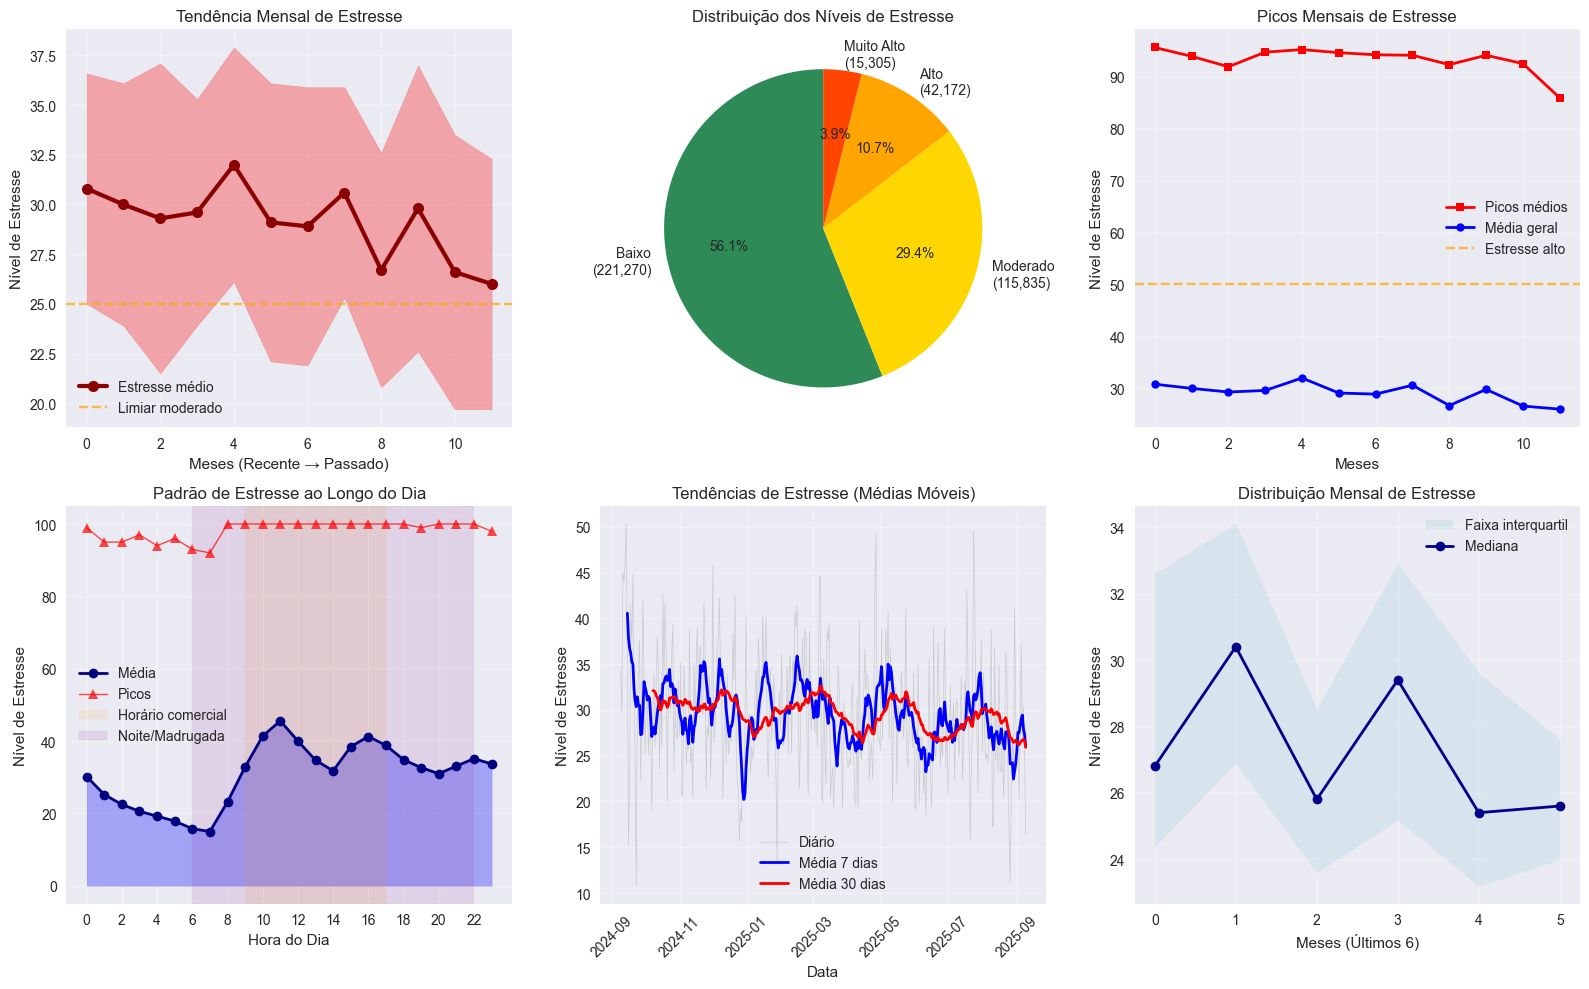

✨ Análise de tendências mensais completa!


In [5]:
# Análise de Tendências Mensais e Categorização do Estresse
print("📅 TENDÊNCIAS MENSAIS DE ESTRESSE")
print("=" * 40)

# Agrupar dados por mês
daily_stress['month'] = daily_stress['date'].dt.to_period('M')
monthly_stress = daily_stress.groupby('month').agg({
    'avg_stress': ['mean', 'std', 'count'],
    'max_stress': 'mean',
    'min_stress': 'mean',
    'std_stress': 'mean'
}).round(1)

monthly_stress.columns = ['avg_stress', 'stress_std', 'days_count', 'avg_max', 'avg_min', 'avg_variability']

print("📊 Últimos 6 meses:")
for month in monthly_stress.tail(6).index:
    stats = monthly_stress.loc[month]
    print(f"   {month}: {stats['avg_stress']:.1f} médio (±{stats['stress_std']:.1f}) | "
          f"Picos {stats['avg_max']:.1f} | {stats['days_count']:.0f} dias")

# Categorização dos níveis de estresse
df_stress['stress_category'] = pd.cut(df_stress['stress'], 
                                      bins=[0, 25, 50, 75, 100], 
                                      labels=['Baixo', 'Moderado', 'Alto', 'Muito Alto'],
                                      include_lowest=True)

stress_distribution = df_stress['stress_category'].value_counts()
print(f"\n🎯 DISTRIBUIÇÃO POR CATEGORIA:")
total_readings = len(df_stress)
for category in ['Baixo', 'Moderado', 'Alto', 'Muito Alto']:
    if category in stress_distribution.index:
        count = stress_distribution[category]
        pct = count / total_readings * 100
        emoji = {'Baixo': '💚', 'Moderado': '💛', 'Alto': '🧡', 'Muito Alto': '🔴'}[category]
        print(f"   {emoji} {category} (0-25): {count:,} registros ({pct:.1f}%)")

# Criar visualizações mensais
plt.figure(figsize=(16, 10))

# 1. Tendência mensal com banda de confiança
plt.subplot(2, 3, 1)
monthly_data = monthly_stress.tail(12)  # Últimos 12 meses
x_pos = range(len(monthly_data))

plt.plot(x_pos, monthly_data['avg_stress'], marker='o', linewidth=3, 
         markersize=8, color='darkred', label='Estresse médio')
plt.fill_between(x_pos, 
                 monthly_data['avg_stress'] - monthly_data['stress_std'],
                 monthly_data['avg_stress'] + monthly_data['stress_std'], 
                 alpha=0.3, color='red')

plt.axhline(y=25, color='orange', linestyle='--', alpha=0.7, label='Limiar moderado')
plt.title('Tendência Mensal de Estresse')
plt.xlabel('Meses (Recente → Passado)')
plt.ylabel('Nível de Estresse')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Distribuição por categoria (pizza)
plt.subplot(2, 3, 2)
sizes = [stress_distribution.get(cat, 0) for cat in ['Baixo', 'Moderado', 'Alto', 'Muito Alto']]
colors = ['#2E8B57', '#FFD700', '#FFA500', '#FF4500']
labels = [f'{cat}\n({size:,})' for cat, size in zip(['Baixo', 'Moderado', 'Alto', 'Muito Alto'], sizes) if size > 0]
valid_sizes = [size for size in sizes if size > 0]
valid_colors = [color for size, color in zip(sizes, colors) if size > 0]

plt.pie(valid_sizes, labels=labels, colors=valid_colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição dos Níveis de Estresse')

# 3. Picos de estresse por mês
plt.subplot(2, 3, 3)
plt.plot(x_pos, monthly_data['avg_max'], marker='s', linewidth=2, 
         markersize=6, color='red', label='Picos médios')
plt.plot(x_pos, monthly_data['avg_stress'], marker='o', linewidth=2, 
         markersize=6, color='blue', label='Média geral')
plt.axhline(y=50, color='orange', linestyle='--', alpha=0.7, label='Estresse alto')
plt.title('Picos Mensais de Estresse')
plt.xlabel('Meses')
plt.ylabel('Nível de Estresse')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Estresse por hora do dia (detalhado)
plt.subplot(2, 3, 4)
hourly_detailed = df_stress.groupby('hour')['stress'].agg(['mean', 'std', 'count', 'max']).reset_index()

plt.plot(hourly_detailed['hour'], hourly_detailed['mean'], marker='o', linewidth=2, 
         color='navy', label='Média')
plt.plot(hourly_detailed['hour'], hourly_detailed['max'], marker='^', linewidth=1, 
         alpha=0.7, color='red', label='Picos')
plt.fill_between(hourly_detailed['hour'], hourly_detailed['mean'], alpha=0.3, color='blue')

# Destacar horários de trabalho
plt.axvspan(9, 17, alpha=0.1, color='orange', label='Horário comercial')
plt.axvspan(22, 6, alpha=0.1, color='purple', label='Noite/Madrugada')

plt.title('Padrão de Estresse ao Longo do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Nível de Estresse')
plt.xticks(range(0, 24, 2))
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Tendência de 30 dias (rolling average)
plt.subplot(2, 3, 5)
daily_stress_sorted = daily_stress.sort_values('date').copy()
daily_stress_sorted['stress_ma7'] = daily_stress_sorted['avg_stress'].rolling(7).mean()
daily_stress_sorted['stress_ma30'] = daily_stress_sorted['avg_stress'].rolling(30).mean()

plt.plot(daily_stress_sorted['date'], daily_stress_sorted['avg_stress'], 
         alpha=0.3, color='gray', linewidth=0.5, label='Diário')
plt.plot(daily_stress_sorted['date'], daily_stress_sorted['stress_ma7'], 
         linewidth=2, color='blue', label='Média 7 dias')
plt.plot(daily_stress_sorted['date'], daily_stress_sorted['stress_ma30'], 
         linewidth=2, color='red', label='Média 30 dias')

plt.title('Tendências de Estresse (Médias Móveis)')
plt.xlabel('Data')
plt.ylabel('Nível de Estresse')
plt.legend()
plt.tick_params(axis='x', rotation=45)
plt.grid(True, alpha=0.3)

# 6. Comparação de quartis por mês
plt.subplot(2, 3, 6)
monthly_quartiles = daily_stress.groupby('month')['avg_stress'].agg([
    lambda x: x.quantile(0.25),
    'median', 
    lambda x: x.quantile(0.75)
]).round(1)
monthly_quartiles.columns = ['Q25', 'Mediana', 'Q75']

recent_months = monthly_quartiles.tail(6)
x_pos = range(len(recent_months))

plt.fill_between(x_pos, recent_months['Q25'], recent_months['Q75'], 
                 alpha=0.3, color='lightblue', label='Faixa interquartil')
plt.plot(x_pos, recent_months['Mediana'], marker='o', linewidth=2, 
         color='darkblue', label='Mediana')

plt.title('Distribuição Mensal de Estresse')
plt.xlabel('Meses (Últimos 6)')
plt.ylabel('Nível de Estresse')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✨ Análise de tendências mensais completa!")


🔗 CORRELAÇÕES: ESTRESSE vs SAÚDE
📊 Dados combinados: 364 dias

📈 Correlações com estresse médio diário:
   📉 Sleep Score: -0.419 (moderada)
   📉 Sleep Hours: -0.203 (fraca)
   📉 Avg Spo2: -0.093 (fraca)
   📈 Max Stress: 0.542 (forte)
   📈 Std Stress: 0.694 (forte)


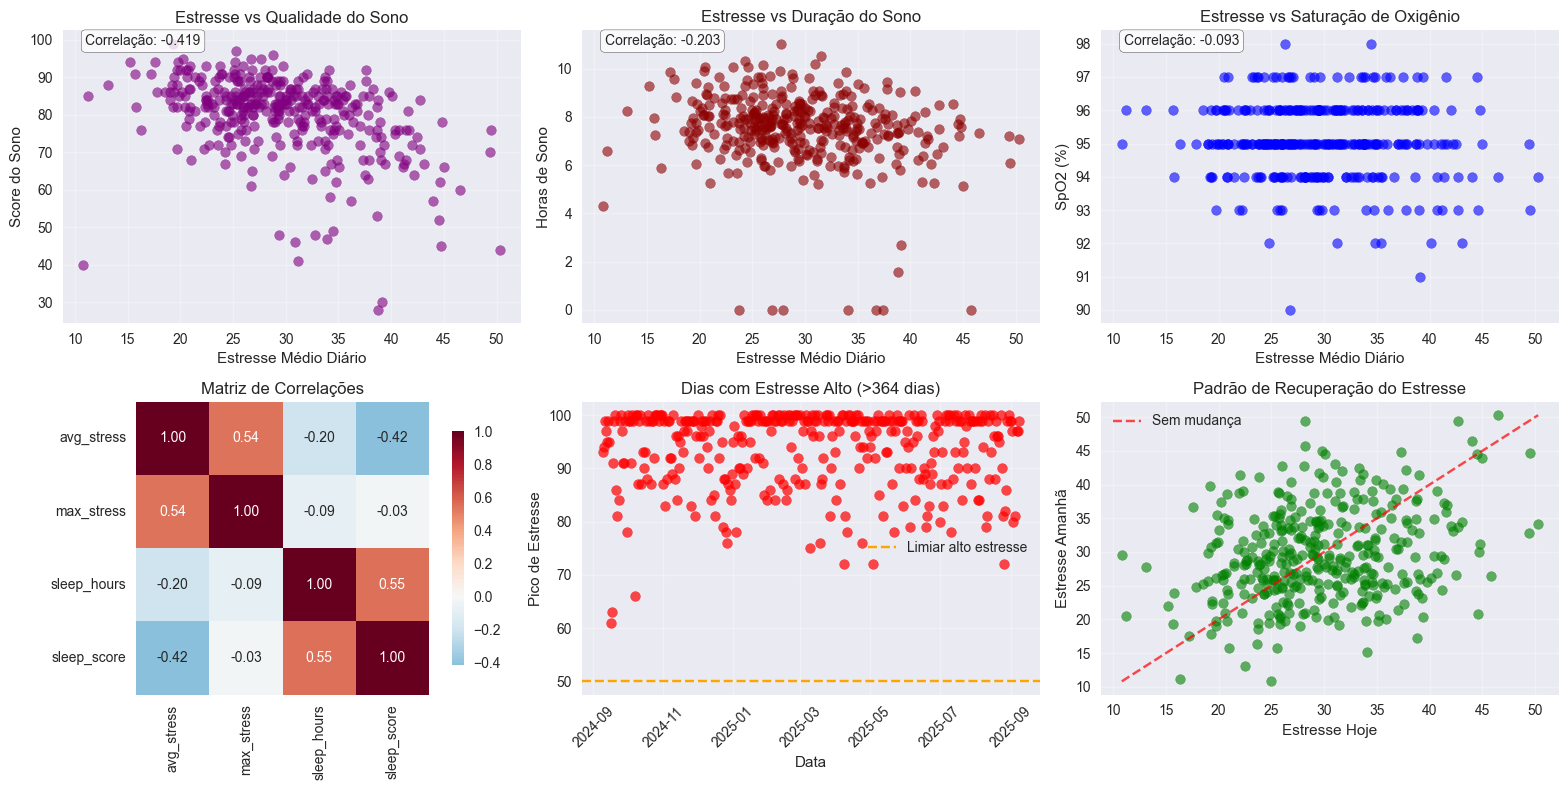

🔗 Análise de correlações completa!


In [6]:
# Análise de Correlações Estresse vs Sono/Saúde
print("🔗 CORRELAÇÕES: ESTRESSE vs SAÚDE")
print("=" * 40)

# Carregar dados do sono para correlação
sleep_query = """
SELECT 
    day,
    total_sleep,
    score as sleep_score,
    avg_stress as sleep_avg_stress,
    avg_spo2
FROM sleep 
WHERE day >= date('now', '-365 days')
  AND total_sleep IS NOT NULL;
"""

df_sleep_corr = pd.read_sql_query(sleep_query, conn_garmin)
df_sleep_corr['day'] = pd.to_datetime(df_sleep_corr['day'])

# Converter sono para horas
def time_to_hours(time_str):
    if pd.isna(time_str) or time_str == '00:00:00':
        return np.nan
    try:
        hours = int(time_str[:2])
        minutes = int(time_str[3:5])
        return hours + minutes/60.0
    except:
        return np.nan

df_sleep_corr['sleep_hours'] = df_sleep_corr['total_sleep'].apply(time_to_hours)

# Combinar dados de estresse diário com sono
daily_stress['date'] = pd.to_datetime(daily_stress['date'])
combined_data = pd.merge(daily_stress, df_sleep_corr, left_on='date', right_on='day', how='inner')

print(f"📊 Dados combinados: {len(combined_data)} dias")

if len(combined_data) > 0:
    # Calcular correlações
    correlation_cols = ['avg_stress', 'sleep_hours', 'sleep_score', 'avg_spo2', 'max_stress', 'std_stress']
    correlations_matrix = combined_data[correlation_cols].corr()
    
    print(f"\n📈 Correlações com estresse médio diário:")
    stress_correlations = correlations_matrix['avg_stress'].drop('avg_stress').sort_values()
    for metric, corr in stress_correlations.items():
        direction = "📈" if corr > 0 else "📉"
        strength = "forte" if abs(corr) > 0.5 else "moderada" if abs(corr) > 0.3 else "fraca"
        print(f"   {direction} {metric.replace('_', ' ').title()}: {corr:.3f} ({strength})")

# Visualizações de correlação
plt.figure(figsize=(16, 8))

if len(combined_data) > 0:
    # 1. Estresse vs Qualidade do Sono
    plt.subplot(2, 3, 1)
    plt.scatter(combined_data['avg_stress'], combined_data['sleep_score'], alpha=0.6, color='purple')
    plt.xlabel('Estresse Médio Diário')
    plt.ylabel('Score do Sono')
    plt.title('Estresse vs Qualidade do Sono')
    
    if len(combined_data) > 1:
        corr = combined_data[['avg_stress', 'sleep_score']].corr().iloc[0,1]
        plt.text(0.05, 0.95, f'Correlação: {corr:.3f}', transform=plt.gca().transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.grid(True, alpha=0.3)
    
    # 2. Estresse vs Horas de Sono
    plt.subplot(2, 3, 2)
    plt.scatter(combined_data['avg_stress'], combined_data['sleep_hours'], alpha=0.6, color='darkred')
    plt.xlabel('Estresse Médio Diário')
    plt.ylabel('Horas de Sono')
    plt.title('Estresse vs Duração do Sono')
    
    if len(combined_data) > 1:
        corr = combined_data[['avg_stress', 'sleep_hours']].corr().iloc[0,1]
        plt.text(0.05, 0.95, f'Correlação: {corr:.3f}', transform=plt.gca().transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.grid(True, alpha=0.3)
    
    # 3. Estresse vs SpO2
    plt.subplot(2, 3, 3)
    spo2_data = combined_data.dropna(subset=['avg_spo2'])
    if len(spo2_data) > 0:
        plt.scatter(spo2_data['avg_stress'], spo2_data['avg_spo2'], alpha=0.6, color='blue')
        plt.xlabel('Estresse Médio Diário')
        plt.ylabel('SpO2 (%)')
        plt.title('Estresse vs Saturação de Oxigênio')
        
        corr = spo2_data[['avg_stress', 'avg_spo2']].corr().iloc[0,1]
        plt.text(0.05, 0.95, f'Correlação: {corr:.3f}', transform=plt.gca().transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        plt.grid(True, alpha=0.3)

# 4. Matriz de correlação completa
plt.subplot(2, 3, 4)
if len(combined_data) > 0:
    correlation_subset = combined_data[['avg_stress', 'max_stress', 'sleep_hours', 'sleep_score']].corr()
    sns.heatmap(correlation_subset, annot=True, cmap='RdBu_r', center=0, 
                square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title('Matriz de Correlações')

# 5. Estresse alto: análise temporal
plt.subplot(2, 3, 5)
high_stress_daily = daily_stress[daily_stress['max_stress'] > 50].copy()
if len(high_stress_daily) > 0:
    plt.scatter(high_stress_daily['date'], high_stress_daily['max_stress'], 
                color='red', alpha=0.7, s=50)
    plt.axhline(y=50, color='orange', linestyle='--', label='Limiar alto estresse')
    plt.title(f'Dias com Estresse Alto (>{len(high_stress_daily)} dias)')
    plt.xlabel('Data')
    plt.ylabel('Pico de Estresse')
    plt.tick_params(axis='x', rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)

# 6. Análise de recuperação (estresse seguinte após picos)
plt.subplot(2, 3, 6)
if len(combined_data) > 1:
    combined_data['stress_tomorrow'] = combined_data['avg_stress'].shift(-1)
    recovery_data = combined_data.dropna(subset=['stress_tomorrow'])
    
    plt.scatter(recovery_data['avg_stress'], recovery_data['stress_tomorrow'], 
                alpha=0.6, color='green')
    # Linha de referência (sem mudança)
    min_val, max_val = recovery_data['avg_stress'].min(), recovery_data['avg_stress'].max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.7, label='Sem mudança')
    
    plt.xlabel('Estresse Hoje')
    plt.ylabel('Estresse Amanhã')
    plt.title('Padrão de Recuperação do Estresse')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔗 Análise de correlações completa!")


⏰ ANÁLISE DE HORÁRIOS CRÍTICOS
🔥 Horários com MAIOR estresse médio:
   11h: 45.6 médio (máx 100) | 11804.0 registros
   10h: 41.4 médio (máx 100) | 9826.0 registros
   16h: 41.2 médio (máx 100) | 15716.0 registros

😌 Horários mais TRANQUILOS:
   07h: 15.0 médio (máx 92) | 19702.0 registros
   06h: 15.8 médio (máx 93) | 20195.0 registros
   05h: 17.9 médio (máx 96) | 20259.0 registros

📊 Horários com MAIOR variabilidade:
   09h: ±27.8 desvio padrão | 32.8 médio
   10h: ±27.1 desvio padrão | 41.4 médio
   11h: ±25.5 desvio padrão | 45.6 médio

🚨 EVENTOS DE ESTRESSE EXTREMO (>75):
   Total de eventos: 15305
   Dias únicos afetados: 357
   Horários mais comuns:
     11h: 1891 eventos (12.4%)
     09h: 1643 eventos (10.7%)
     10h: 1547 eventos (10.1%)
     15h: 1166 eventos (7.6%)
     12h: 1125 eventos (7.4%)
   Dias da semana com mais eventos:
     Sáb: 4295 eventos (28.1%)
     Dom: 2501 eventos (16.3%)
     Qui: 2251 eventos (14.7%)


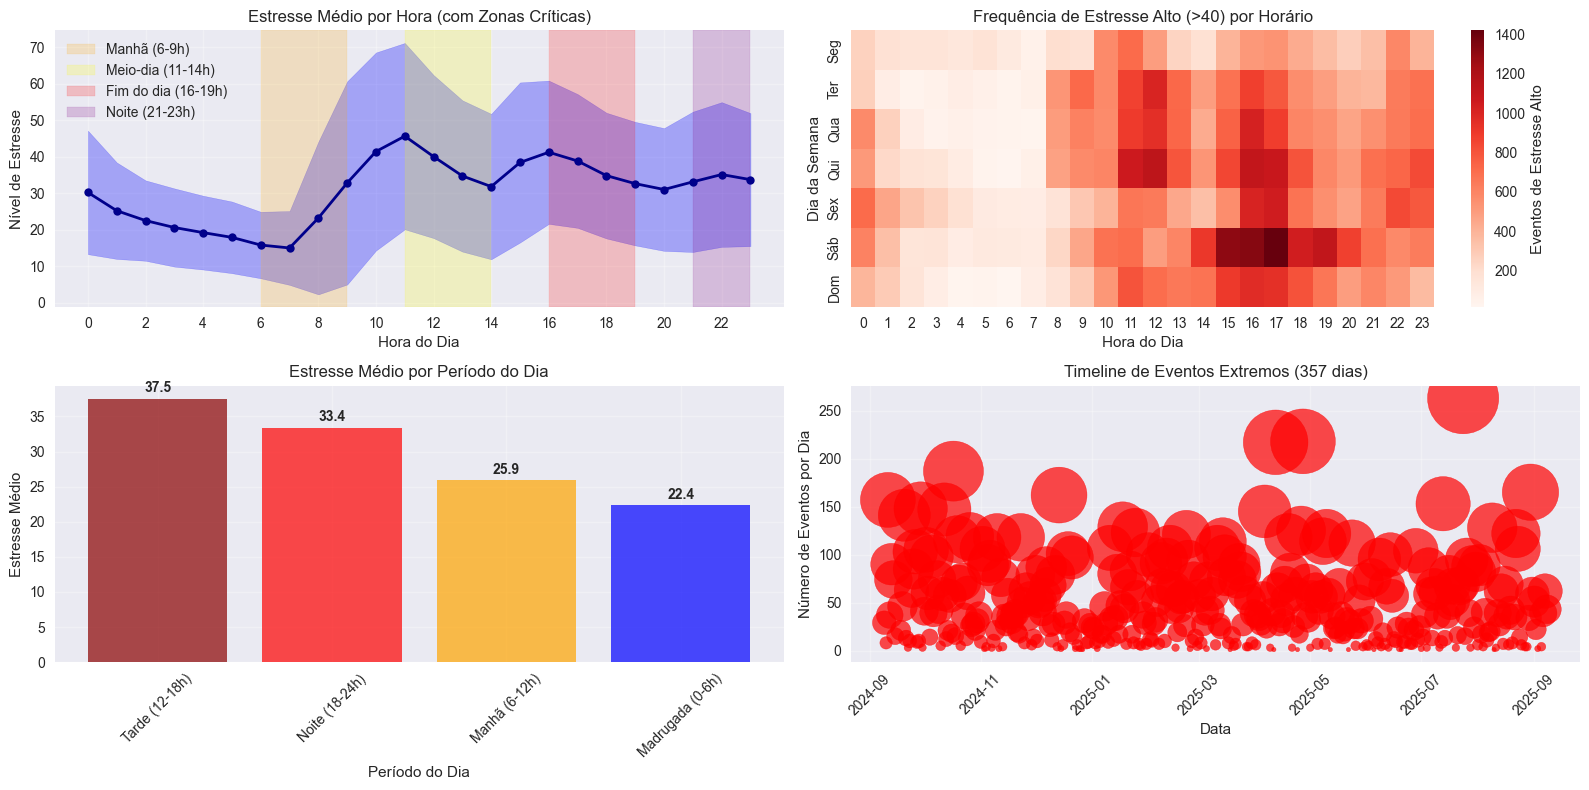

⏰ Análise de horários críticos completa!


In [7]:
# Análise de Horários Críticos e Eventos Específicos
print("⏰ ANÁLISE DE HORÁRIOS CRÍTICOS")
print("=" * 40)

# Identificar horários de pico de estresse
hourly_analysis = df_stress.groupby('hour')['stress'].agg(['mean', 'max', 'std', 'count']).round(1)

# Horários com maior estresse médio
top_stress_hours = hourly_analysis.nlargest(3, 'mean')
print("🔥 Horários com MAIOR estresse médio:")
for hour, stats in top_stress_hours.iterrows():
    print(f"   {hour:02d}h: {stats['mean']:.1f} médio (máx {stats['max']:.0f}) | {stats['count']} registros")

# Horários mais tranquilos  
low_stress_hours = hourly_analysis.nsmallest(3, 'mean')
print(f"\n😌 Horários mais TRANQUILOS:")
for hour, stats in low_stress_hours.iterrows():
    print(f"   {hour:02d}h: {stats['mean']:.1f} médio (máx {stats['max']:.0f}) | {stats['count']} registros")

# Análise de variabilidade por horário
most_variable_hours = hourly_analysis.nlargest(3, 'std')
print(f"\n📊 Horários com MAIOR variabilidade:")
for hour, stats in most_variable_hours.iterrows():
    print(f"   {hour:02d}h: ±{stats['std']:.1f} desvio padrão | {stats['mean']:.1f} médio")

# Análise de eventos de estresse extremo (>75)
extreme_stress = df_stress[df_stress['stress'] > 75].copy()
if len(extreme_stress) > 0:
    print(f"\n🚨 EVENTOS DE ESTRESSE EXTREMO (>75):")
    print(f"   Total de eventos: {len(extreme_stress)}")
    print(f"   Dias únicos afetados: {extreme_stress['date'].nunique()}")
    
    # Horários mais comuns para estresse extremo
    extreme_hours = extreme_stress['hour'].value_counts().head(5)
    print(f"   Horários mais comuns:")
    for hour, count in extreme_hours.items():
        pct = count / len(extreme_stress) * 100
        print(f"     {hour:02d}h: {count} eventos ({pct:.1f}%)")
        
    # Dias da semana com estresse extremo
    extreme_weekdays = extreme_stress['weekday_pt'].value_counts()
    print(f"   Dias da semana com mais eventos:")
    for day, count in extreme_weekdays.head(3).items():
        pct = count / len(extreme_stress) * 100
        print(f"     {day}: {count} eventos ({pct:.1f}%)")

# Visualização de horários críticos
plt.figure(figsize=(16, 8))

# 1. Estresse por hora com zonas críticas
plt.subplot(2, 2, 1)
hours = hourly_analysis.index
plt.plot(hours, hourly_analysis['mean'], marker='o', linewidth=2, markersize=6, color='darkblue')
plt.fill_between(hours, hourly_analysis['mean'] - hourly_analysis['std'],
                 hourly_analysis['mean'] + hourly_analysis['std'], alpha=0.3, color='blue')

# Destacar zonas críticas
plt.axvspan(6, 9, alpha=0.2, color='orange', label='Manhã (6-9h)')
plt.axvspan(11, 14, alpha=0.2, color='yellow', label='Meio-dia (11-14h)')  
plt.axvspan(16, 19, alpha=0.2, color='red', label='Fim do dia (16-19h)')
plt.axvspan(21, 23, alpha=0.2, color='purple', label='Noite (21-23h)')

plt.title('Estresse Médio por Hora (com Zonas Críticas)')
plt.xlabel('Hora do Dia')
plt.ylabel('Nível de Estresse')
plt.xticks(range(0, 24, 2))
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Heatmap de intensidade por hora e dia da semana
plt.subplot(2, 2, 2)
# Filtrar apenas estresse alto para mostrar padrões
high_stress_heatmap = df_stress[df_stress['stress'] > 40].pivot_table(
    values='stress', index='weekday_pt', columns='hour', aggfunc='count', fill_value=0)
high_stress_heatmap = high_stress_heatmap.reindex(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])

sns.heatmap(high_stress_heatmap, cmap='Reds', cbar_kws={'label': 'Eventos de Estresse Alto'})
plt.title('Frequência de Estresse Alto (>40) por Horário')
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')

# 3. Distribuição de estresse por período do dia
plt.subplot(2, 2, 3)
df_stress['period'] = df_stress['hour'].apply(lambda x: 
    'Madrugada (0-6h)' if 0 <= x < 6 else
    'Manhã (6-12h)' if 6 <= x < 12 else  
    'Tarde (12-18h)' if 12 <= x < 18 else
    'Noite (18-24h)'
)

period_stress = df_stress.groupby('period')['stress'].mean().sort_values(ascending=False)
colors = ['darkred', 'red', 'orange', 'blue']

bars = plt.bar(range(len(period_stress)), period_stress.values, 
               color=colors[:len(period_stress)], alpha=0.7)
plt.title('Estresse Médio por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Estresse Médio')
plt.xticks(range(len(period_stress)), period_stress.index, rotation=45)

# Adicionar valores nas barras
for bar, value in zip(bars, period_stress.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3)

# 4. Timeline de eventos de estresse alto
plt.subplot(2, 2, 4)
if len(extreme_stress) > 0:
    # Agrupar por data para mostrar frequência de eventos extremos
    extreme_by_date = extreme_stress.groupby('date').size().reset_index(name='events')
    extreme_by_date['date'] = pd.to_datetime(extreme_by_date['date'])
    
    plt.scatter(extreme_by_date['date'], extreme_by_date['events'], 
                color='red', alpha=0.7, s=extreme_by_date['events']*10)
    plt.title(f'Timeline de Eventos Extremos ({len(extreme_by_date)} dias)')
    plt.xlabel('Data')
    plt.ylabel('Número de Eventos por Dia')
    plt.tick_params(axis='x', rotation=45)
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Sem eventos de estresse extremo\n(>75) no período analisado', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Eventos de Estresse Extremo')

plt.tight_layout()
plt.show()

print("⏰ Análise de horários críticos completa!")


In [8]:
# Funções Customizáveis para Análise de Períodos Específicos

def analyze_stress_period(start_date, end_date, label="Período Custom"):
    """
    Analisar estresse para qualquer período específico
    
    Args:
        start_date: '2024-01-01' (formato)
        end_date: '2024-12-31' (formato)  
        label: Descrição do período
    """
    
    # Filtrar dados do período
    period_data = df_stress[
        (df_stress['date'] >= pd.to_datetime(start_date).date()) & 
        (df_stress['date'] <= pd.to_datetime(end_date).date())
    ]
    
    if len(period_data) == 0:
        print(f"⚠️ Nenhum dado de estresse encontrado para {label}")
        return
    
    # Calcular estatísticas do período
    avg_stress = period_data['stress'].mean()
    std_stress = period_data['stress'].std()
    max_stress = period_data['stress'].max()
    min_stress = period_data['stress'].min()
    days_unique = period_data['date'].nunique()
    total_readings = len(period_data)
    
    # Categorizar estresse
    high_stress_count = (period_data['stress'] > 50).sum()
    low_stress_count = (period_data['stress'] < 25).sum()
    
    print(f"\n🔍 ANÁLISE: {label.upper()}")
    print(f"📅 Período: {start_date} até {end_date}")
    print(f"📊 Dias únicos: {days_unique}")
    print(f"📊 Total registros: {total_readings:,}")
    print(f"📊 Registros/dia: {total_readings/days_unique:.0f}")
    print(f"😌 Estresse médio: {avg_stress:.1f} (±{std_stress:.1f})")
    print(f"📏 Faixa: {min_stress:.0f} - {max_stress:.0f}")
    print(f"🔥 Estresse alto (>50): {high_stress_count:,} registros ({high_stress_count/total_readings*100:.1f}%)")
    print(f"💚 Estresse baixo (<25): {low_stress_count:,} registros ({low_stress_count/total_readings*100:.1f}%)")
    
    # Horários mais estressantes no período
    hourly_period = period_data.groupby('hour')['stress'].mean().nlargest(3)
    print(f"⏰ Horários mais estressantes:")
    for hour, stress_level in hourly_period.items():
        print(f"     {hour:02d}h: {stress_level:.1f}")
    
    return period_data

def compare_stress_periods(period1_start, period1_end, period2_start, period2_end, 
                          label1="Período 1", label2="Período 2"):
    """
    Comparar estresse entre dois períodos diferentes
    """
    
    data1 = df_stress[
        (df_stress['date'] >= pd.to_datetime(period1_start).date()) & 
        (df_stress['date'] <= pd.to_datetime(period1_end).date())
    ]
    
    data2 = df_stress[
        (df_stress['date'] >= pd.to_datetime(period2_start).date()) & 
        (df_stress['date'] <= pd.to_datetime(period2_end).date())
    ]
    
    if len(data1) == 0 or len(data2) == 0:
        print(f"⚠️ Dados insuficientes para comparação")
        return
        
    avg1, avg2 = data1['stress'].mean(), data2['stress'].mean()
    std1, std2 = data1['stress'].std(), data2['stress'].std()
    
    print(f"\n⚖️ COMPARAÇÃO: {label1.upper()} vs {label2.upper()}")
    print(f"📊 {label1}: {avg1:.1f} (±{std1:.1f}) | {len(data1):,} registros")
    print(f"📊 {label2}: {avg2:.1f} (±{std2:.1f}) | {len(data2):,} registros") 
    print(f"📈 Diferença: {avg2-avg1:+.1f} pontos ({'melhora' if avg2-avg1 < 0 else 'piora'})")
    
    return data1, data2

# Exemplos de análises customizadas
print("🔬 ANÁLISES CUSTOMIZADAS")
print("=" * 35)

# Análises sazonais
analyze_stress_period('2024-12-01', '2025-02-28', 'Inverno 2024-25')
analyze_stress_period('2024-06-01', '2024-08-31', 'Verão 2024')
analyze_stress_period('2024-09-01', '2024-11-30', 'Outono 2024')

# Comparações de períodos
compare_stress_periods('2025-01-01', '2025-03-31', '2024-01-01', '2024-03-31',
                      'Q1 2025', 'Q1 2024')

compare_stress_periods('2025-07-01', '2025-09-08', '2025-01-01', '2025-03-31',
                      'Últimos 2 meses', 'Início do ano')

# Análise de fins de semana vs dias úteis por mês
print(f"\n📅 FINS DE SEMANA vs DIAS ÚTEIS (por mês):")
for month in daily_stress['month'].unique()[-6:]:  # Últimos 6 meses
    month_data = daily_stress[daily_stress['month'] == month]
    weekday_avg = month_data[~month_data['is_weekend']]['avg_stress'].mean()
    weekend_avg = month_data[month_data['is_weekend']]['avg_stress'].mean()
    
    if not pd.isna(weekday_avg) and not pd.isna(weekend_avg):
        diff = weekend_avg - weekday_avg
        print(f"   {month}: Úteis {weekday_avg:.1f} | Fins de semana {weekend_avg:.1f} | Dif {diff:+.1f}")

print("\n✨ Funções customizadas prontas! Modifique as datas acima para suas análises específicas.")


🔬 ANÁLISES CUSTOMIZADAS

🔍 ANÁLISE: INVERNO 2024-25
📅 Período: 2024-12-01 até 2025-02-28
📊 Dias únicos: 90
📊 Total registros: 97,218
📊 Registros/dia: 1080
😌 Estresse médio: 30.0 (±19.6)
📏 Faixa: 0 - 100
🔥 Estresse alto (>50): 15,083 registros (15.5%)
💚 Estresse baixo (<25): 49,807 registros (51.2%)
⏰ Horários mais estressantes:
     11h: 47.9
     10h: 43.2
     12h: 41.0
⚠️ Nenhum dado de estresse encontrado para Verão 2024

🔍 ANÁLISE: OUTONO 2024
📅 Período: 2024-09-01 até 2024-11-30
📊 Dias únicos: 83
📊 Total registros: 88,134
📊 Registros/dia: 1062
😌 Estresse médio: 31.2 (±20.2)
📏 Faixa: 0 - 100
🔥 Estresse alto (>50): 15,274 registros (17.3%)
💚 Estresse baixo (<25): 43,354 registros (49.2%)
⏰ Horários mais estressantes:
     16h: 46.7
     11h: 45.4
     17h: 42.5
⚠️ Dados insuficientes para comparação

⚖️ COMPARAÇÃO: ÚLTIMOS 2 MESES vs INÍCIO DO ANO
📊 Últimos 2 meses: 27.8 (±19.4) | 76,655 registros
📊 Início do ano: 30.0 (±19.8) | 95,136 registros
📈 Diferença: +2.2 pontos (piora)

📅 

In [9]:
# Resumo Completo e Dicas para Análises Avançadas

print("📋 RESUMO COMPLETO DA ANÁLISE DE ESTRESSE")
print("=" * 50)

# Resumo executivo 
total_records = len(df_stress)
total_days = df_stress['date'].nunique()
date_range = f"{df_stress['date'].min()} até {df_stress['date'].max()}"
data_completeness = total_days / ((df_stress['timestamp'].max().date() - df_stress['timestamp'].min().date()).days + 1) * 100

print(f"📅 Período analisado: {date_range}")
print(f"📊 Total de registros: {total_records:,}")
print(f"📊 Dias únicos: {total_days}")
print(f"📊 Registros por dia: {total_records/total_days:.0f}")
print(f"📈 Completude dos dados: {data_completeness:.1f}%")

print(f"\n😌 INSIGHTS PRINCIPAIS:")
avg_stress_overall = df_stress['stress'].mean()
stress_trend_recent = daily_stress_sorted['stress_ma30'].tail(30).mean()
stress_trend_older = daily_stress_sorted['stress_ma30'].iloc[-60:-30].mean()
trend_direction = stress_trend_recent - stress_trend_older

print(f"   📊 Estresse médio geral: {avg_stress_overall:.1f}")
print(f"   📈 Tendência recente: {trend_direction:+.1f} ({'melhora' if trend_direction < 0 else 'piora'}) vs 30 dias atrás")
print(f"   ⏰ Horário mais estressante: {hourly_analysis['mean'].idxmax():02d}h ({hourly_analysis['mean'].max():.1f})")
print(f"   ⏰ Horário mais tranquilo: {hourly_analysis['mean'].idxmin():02d}h ({hourly_analysis['mean'].min():.1f})")
print(f"   🏖️ Diferença fim de semana: {weekend_daily.mean() - weekday_daily.mean():+.1f} vs dias úteis")
print(f"   🔥 Eventos de alto estresse: {len(df_stress[df_stress['stress'] > 50]):,} registros")

# Categorização final
stress_categories = df_stress['stress_category'].value_counts()
print(f"\n🎯 DISTRIBUIÇÃO FINAL:")
for category, count in stress_categories.items():
    pct = count / total_records * 100
    emoji_map = {'Baixo': '💚', 'Moderado': '💛', 'Alto': '🧡', 'Muito Alto': '🔴'}
    emoji = emoji_map.get(str(category), '📊')
    print(f"   {emoji} {category}: {count:,} ({pct:.1f}%)")

# Recomendações baseadas nos dados
print(f"\n💡 RECOMENDAÇÕES BASEADAS NOS SEUS DADOS:")

# Análise de horários críticos
peak_hours = hourly_analysis.nlargest(2, 'mean').index.tolist()
low_hours = hourly_analysis.nsmallest(2, 'mean').index.tolist()

print(f"   ⏰ Horários de atenção: {peak_hours[0]:02d}h e {peak_hours[1]:02d}h (picos de estresse)")
print(f"   😌 Horários para relaxar: {low_hours[0]:02d}h e {low_hours[1]:02d}h (níveis baixos)")

if difference > 0:
    print(f"   🏖️ Fins de semana são mais estressantes (+{difference:.1f}) - considere estratégias de relaxamento")
else:
    print(f"   🏖️ Fins de semana são mais relaxantes ({difference:.1f}) - padrão saudável!")

# Análise de correlação com sono
if len(combined_data) > 0:
    sleep_stress_corr = combined_data[['avg_stress', 'sleep_score']].corr().iloc[0,1]
    if sleep_stress_corr < -0.3:
        print(f"   😴 Forte correlação estresse-sono: focar na qualidade do sono para reduzir estresse")
    elif abs(sleep_stress_corr) < 0.2:
        print(f"   😴 Estresse e sono independentes: outros fatores podem estar influenciando")

print(f"\n🔍 IDEIAS PARA ANÁLISES ADICIONAIS:")
print("   • Correlacionar com dados de atividade física (exercício reduz estresse?)")
print("   • Analisar estresse em torno de datas específicas (feriados, eventos)")
print("   • Estudar padrões sazonais ao longo de múltiplos anos")
print("   • Criar alertas para padrões de estresse anômalo")
print("   • Comparar estresse antes/depois de viagens ou mudanças na rotina")
print("   • Analisar relação entre variabilidade do estresse e bem-estar geral")

print(f"\n📊 MÉTRICAS DISPONÍVEIS PARA ANÁLISE:")
print("   • timestamp, stress (dados brutos contínuos)")
print("   • hour, weekday, is_weekend (padrões temporais)")
print("   • stress_category (baixo/moderado/alto/muito alto)")
print("   • Dados agregados: avg_stress, max_stress, min_stress, std_stress por dia")
print("   • Correlações: sleep_hours, sleep_score, avg_spo2")

# Fechar conexões
conn_garmin.close()
conn_monitoring.close()

print(f"\n✅ Análise completa! Conexões do banco fechadas.")
print(f"🎯 Você tem {total_records:,} registros de estresse para explorar!")
print(f"😌 Estresse médio geral: {avg_stress_overall:.1f}/100")
print(f"🚀 Pronto para análises personalizadas!")


📋 RESUMO COMPLETO DA ANÁLISE DE ESTRESSE
📅 Período analisado: 2024-09-09 até 2025-09-09
📊 Total de registros: 394,582
📊 Dias únicos: 365
📊 Registros por dia: 1081
📈 Completude dos dados: 99.7%

😌 INSIGHTS PRINCIPAIS:
   📊 Estresse médio geral: 29.3
   📈 Tendência recente: -1.3 (melhora) vs 30 dias atrás
   ⏰ Horário mais estressante: 11h (45.6)
   ⏰ Horário mais tranquilo: 07h (15.0)
   🏖️ Diferença fim de semana: +4.0 vs dias úteis
   🔥 Eventos de alto estresse: 57,477 registros

🎯 DISTRIBUIÇÃO FINAL:
   💚 Baixo: 221,270 (56.1%)
   💛 Moderado: 115,835 (29.4%)
   🧡 Alto: 42,172 (10.7%)
   🔴 Muito Alto: 15,305 (3.9%)

💡 RECOMENDAÇÕES BASEADAS NOS SEUS DADOS:
   ⏰ Horários de atenção: 11h e 10h (picos de estresse)
   😌 Horários para relaxar: 07h e 06h (níveis baixos)
   🏖️ Fins de semana são mais estressantes (+4.0) - considere estratégias de relaxamento
   😴 Forte correlação estresse-sono: focar na qualidade do sono para reduzir estresse

🔍 IDEIAS PARA ANÁLISES ADICIONAIS:
   • Correlac

In [10]:
# Queries SQL Avançadas para Análises Específicas
# Descomente qualquer query abaixo para insights específicos

print("🛠️ QUERIES SQL PARA ANÁLISES AVANÇADAS")
print("Descomente qualquer query abaixo para análises específicas:")
print()

# # Reconectar para queries adicionais (descomente para usar)
# conn = sqlite3.connect(os.path.expanduser('~/HealthData/DBs/garmin.db'))

# # 1. Encontrar suas semanas com maior e menor estresse
# weekly_stress = """
# SELECT 
#     strftime('%Y-Semana%W', timestamp) as semana,
#     COUNT(*) as registros,
#     AVG(stress) as estresse_medio,
#     MAX(stress) as pico_stress,
#     MIN(stress) as min_stress
# FROM stress 
# WHERE timestamp >= datetime('now', '-365 days') 
#   AND stress >= 0
# GROUP BY strftime('%Y-Semana%W', timestamp)
# HAVING COUNT(*) >= 50  -- Pelo menos 50 registros por semana
# ORDER BY estresse_medio DESC;
# """

# # 2. Análise de estresse por horário específico (personalize a hora)
# stress_by_specific_hour = """
# SELECT 
#     date(timestamp) as dia,
#     AVG(stress) as estresse_medio,
#     MAX(stress) as pico_stress,
#     COUNT(*) as registros
# FROM stress 
# WHERE strftime('%H', timestamp) = '14'  -- 14h (personalize aqui)
#   AND timestamp >= datetime('now', '-90 days')
#   AND stress >= 0
# GROUP BY date(timestamp)
# ORDER BY dia DESC;
# """

# # 3. Padrões de estresse em torno de eventos específicos
# event_analysis = """
# SELECT 
#     date(timestamp) as dia,
#     AVG(stress) as estresse_medio,
#     MAX(stress) as pico_stress,
#     CASE 
#         WHEN date(timestamp) BETWEEN '2024-12-20' AND '2025-01-05' THEN 'Feriados'
#         WHEN strftime('%w', timestamp) IN ('0', '6') THEN 'Fim de semana'
#         ELSE 'Dia útil regular'
#     END as tipo_periodo
# FROM stress 
# WHERE timestamp >= datetime('now', '-90 days')
#   AND stress >= 0
# GROUP BY date(timestamp)
# ORDER BY dia DESC;
# """

# # 4. Identificar padrões de recuperação após estresse alto
# recovery_patterns = """
# WITH daily_max_stress AS (
#     SELECT 
#         date(timestamp) as dia,
#         MAX(stress) as max_stress_dia
#     FROM stress 
#     WHERE timestamp >= datetime('now', '-180 days') AND stress >= 0
#     GROUP BY date(timestamp)
# )
# SELECT 
#     d1.dia as dia_estresse,
#     d1.max_stress_dia as estresse_alto,
#     d2.max_stress_dia as estresse_proximo_dia,
#     (d2.max_stress_dia - d1.max_stress_dia) as diferenca
# FROM daily_max_stress d1
# JOIN daily_max_stress d2 ON date(d1.dia, '+1 day') = d2.dia
# WHERE d1.max_stress_dia > 60  -- Dias com estresse alto
# ORDER BY d1.dia DESC;
# """

# # 5. Tendências mensais detalhadas
# monthly_detailed = """
# SELECT 
#     strftime('%Y-%m', timestamp) as mes,
#     COUNT(*) as registros,
#     AVG(stress) as estresse_medio,
#     MIN(stress) as menor_stress,
#     MAX(stress) as maior_stress,
#     COUNT(CASE WHEN stress > 50 THEN 1 END) as eventos_alto_stress,
#     COUNT(CASE WHEN stress < 25 THEN 1 END) as eventos_baixo_stress
# FROM stress 
# WHERE timestamp >= datetime('now', '-12 months') 
#   AND stress >= 0
# GROUP BY strftime('%Y-%m', timestamp)
# ORDER BY mes DESC;
# """

# # Exemplo: executar uma query (descomente para usar)
# result = pd.read_sql_query(monthly_detailed, conn)
# display(result)

# # Sempre feche a conexão quando terminar
# # conn.close()

print("💡 DICAS PARA QUERIES PERSONALIZADAS:")
print("• Modifique as datas em qualquer query para seu período de interesse")
print("• Use 'datetime(now, -X days/months/years)' para datas relativas")
print("• Combine com dados de sono/atividades fazendo JOIN entre tabelas")
print("• Exporte resultados: df.to_csv('minha_analise_estresse.csv')")
print("• Use 'strftime()' para agrupar por semana (%W), mês (%m), etc.")

print(f"\n🎯 EXAMPLES DE ANÁLISES PERSONALIZADAS:")
print("# Estresse durante horário comercial vs outros horários:")
print("# SELECT CASE WHEN strftime('%H', timestamp) BETWEEN '09' AND '17' THEN 'Comercial' ELSE 'Fora' END, AVG(stress) FROM stress GROUP BY 1;")
print()
print("# Comparar estresse em meses específicos:")  
print("# SELECT strftime('%m', timestamp) as mes, AVG(stress) FROM stress WHERE timestamp >= datetime('now', '-2 years') GROUP BY mes ORDER BY mes;")
print()
print("# Encontrar seus dias mais estressantes:")
print("# SELECT date(timestamp), AVG(stress), MAX(stress) FROM stress GROUP BY date(timestamp) ORDER BY AVG(stress) DESC LIMIT 10;")

print(f"\n😌 Sua análise de estresse está completa!")
print(f"🎉 Explore os padrões, modifique as datas e descubra insights personalizados!")


🛠️ QUERIES SQL PARA ANÁLISES AVANÇADAS
Descomente qualquer query abaixo para análises específicas:

💡 DICAS PARA QUERIES PERSONALIZADAS:
• Modifique as datas em qualquer query para seu período de interesse
• Use 'datetime(now, -X days/months/years)' para datas relativas
• Combine com dados de sono/atividades fazendo JOIN entre tabelas
• Exporte resultados: df.to_csv('minha_analise_estresse.csv')
• Use 'strftime()' para agrupar por semana (%W), mês (%m), etc.

🎯 EXAMPLES DE ANÁLISES PERSONALIZADAS:
# Estresse durante horário comercial vs outros horários:
# SELECT CASE WHEN strftime('%H', timestamp) BETWEEN '09' AND '17' THEN 'Comercial' ELSE 'Fora' END, AVG(stress) FROM stress GROUP BY 1;

# Comparar estresse em meses específicos:
# SELECT strftime('%m', timestamp) as mes, AVG(stress) FROM stress WHERE timestamp >= datetime('now', '-2 years') GROUP BY mes ORDER BY mes;

# Encontrar seus dias mais estressantes:
# SELECT date(timestamp), AVG(stress), MAX(stress) FROM stress GROUP BY date(